# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SequentialFeatureSelector
from random import shuffle
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_wine
import time
from sklearn.metrics import accuracy_score

In [142]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [143]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



The categorical variables are job, marital, default, housing, loan, contact, month, day, poutcome, y. We need to make sure this data has their unknowns handled.
The numeric data is the age, duration, campaign, pdays, previous, variation rates, CSI, CCI, euriborem, number employed.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The business objective of this task would be to construct a predictive model that can help our clients determine whether their customers, or other people, would be interested in one of their long term deposit plans. This information could help them tailor their efforts to contacting those customers as opposed to others who may be unlikely to consider such an option. 

Missing Data:
Series([], dtype: int64)


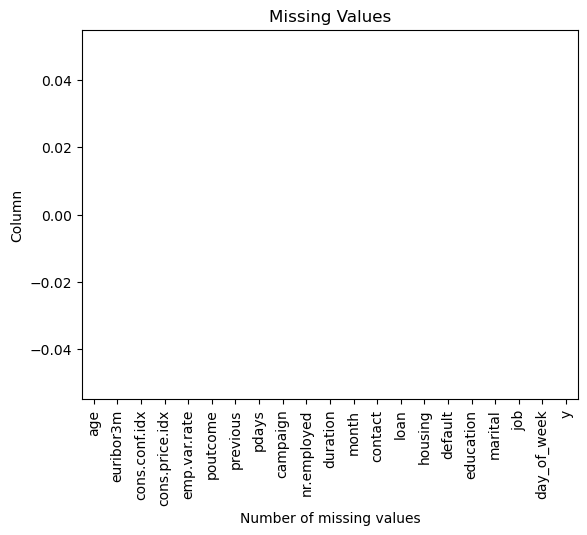

In [145]:
missing_data = df.isnull().sum()
print(f"Missing Data:\n{missing_data[missing_data > 0]}")
df.isnull().sum().sort_values().plot(kind = 'bar')
plt.title('Missing Values')
plt.xlabel("Number of missing values")
plt.ylabel("Column")
plt.show()

In [146]:
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [147]:
data = df.copy()
data = data.dropna()
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [148]:
data.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<Axes: xlabel='y'>

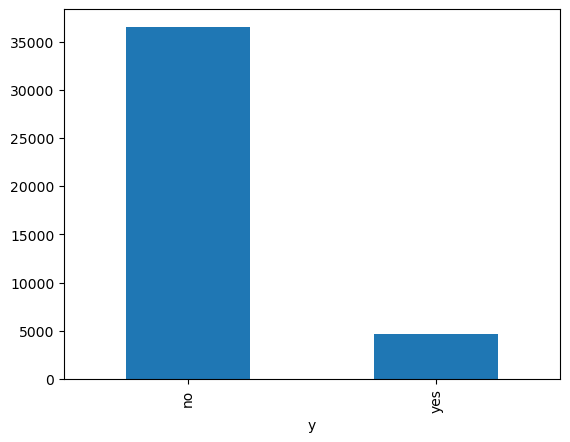

In [149]:
#target column for encoding could be 'y' because it represents number of interested people
data['y'].value_counts().plot(kind = 'bar')

In [150]:
categorical_columns = data.select_dtypes(include = ['object']).columns
df_encoded = pd.get_dummies(data[categorical_columns], drop_first=True)
df_encoded.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

Using train_test_split to split up all the data into their sets.

In [151]:
X = pd.get_dummies(data.drop(columns = ['y']), drop_first=True)
X.describe()
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
X_train.head()

(32950, 53) (8238, 53)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
12556,40,94,2,999,0,1.4,93.918,-42.7,4.960,5228.1,...,False,False,False,False,True,False,False,False,True,False
35451,31,116,4,999,0,-1.8,92.893,-46.2,1.244,5099.1,...,True,False,False,False,True,False,False,False,True,False
30592,59,13,6,999,1,-1.8,92.893,-46.2,1.354,5099.1,...,True,False,False,False,True,False,False,False,False,False
17914,43,94,5,999,0,1.4,93.918,-42.7,4.961,5228.1,...,False,False,False,False,False,False,True,False,True,False
3315,39,344,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,True,False,False,False,False,True,False,False,True,False


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [153]:
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)
print(f"Baseline Score: {baseline_score}")

Baseline Score: 0.8865015780529255


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [154]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
logreg = LogisticRegression().fit(X_train, y_train)


### Problem 9: Score the Model

What is the accuracy of your model?

In [155]:
logreg.score(X_test, y_test)


0.9115076474872542

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [156]:
#result dataframe 
results = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

In [157]:
logistic_model = LogisticRegression().fit(X_train, y_train)
logistic_model.score(X_test, y_test)
start_time = time.time()
logistic_model.fit(X_train, y_train)
train_time = time.time() - start_time
train_preds = logreg.predict(X_train)
test_preds = logreg.predict(X_test)
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

linear_results = pd.DataFrame([{
    'Model': 'Logistic Regression',
    'Train Time': train_time,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
}])
results = pd.concat([results, linear_results], ignore_index=True)
print(results) 

                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.123676        0.911624       0.911508


/var/folders/s1/nlsxm2jn1zg_49d94n94dm4h0000gn/T/ipykernel_11964/4037350239.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, linear_results], ignore_index=True)


In [158]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
start_time = time.time()
knn_model.fit(X_train, y_train)
train_time = time.time() - start_time
train_preds = knn_model.predict(X_train)
test_preds = knn_model.predict(X_test)
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)
knn_results = pd.DataFrame([{
    'Model': 'K-Nearest Neighbors',
    'Train Time': train_time,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
}])
results = pd.concat([results, knn_results], ignore_index=True)
print(results)

                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.123676        0.911624       0.911508
1  K-Nearest Neighbors    0.006570        0.920850       0.897184


In [159]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
start_time = time.time()
tree_model.fit(X_train, y_train)
train_time = time.time() - start_time
train_preds = tree_model.predict(X_train)
test_preds = tree_model.predict(X_test)
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)
tree_results = pd.DataFrame([{
    'Model': 'Decision Tree',
    'Train Time': train_time,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
}])
results = pd.concat([results, tree_results], ignore_index=True)
print(results)

                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.123676        0.911624       0.911508
1  K-Nearest Neighbors    0.006570        0.920850       0.897184
2        Decision Tree    0.137681        1.000000       0.885773


In [160]:
from sklearn.svm import SVC
svm_model = SVC()
start_time = time.time()
svm_model.fit(X_train, y_train)
train_time = time.time() - start_time
train_preds = svm_model.predict(X_train)
test_preds = svm_model.predict(X_test)
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)
svm_results = pd.DataFrame([{
    'Model': 'SVM',
    'Train Time': train_time,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
}])
results = pd.concat([results, svm_results], ignore_index=True)
print(results)

                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.123676        0.911624       0.911508
1  K-Nearest Neighbors    0.006570        0.920850       0.897184
2        Decision Tree    0.137681        1.000000       0.885773
3                  SVM    8.626838        0.925615       0.908352


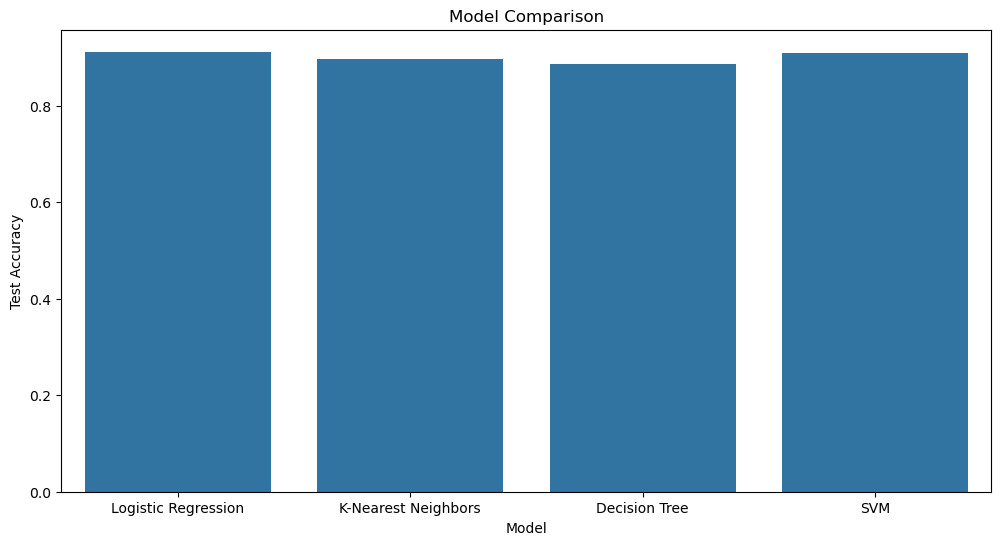

In [161]:
# graph of results
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Test Accuracy', data=results)
plt.title('Model Comparison')
plt.show()


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions